# 🚙**Project: Machine Learning Model for Auto Insurance Pricing**🚙
---
## **Instructor:**  
- **Harpreet Virk**

## **Contributors:**  
- **Lu Dang Duy Khanh**
- **Truc Anh Nguyen**
- **Bassey Elliot**
- **Papa Kofi Arhin**

## **College & Course:**  
**St. Clair College / DAB422-26W-002 CAPSTONE PROJECT 2 Winter 2026 - 002**

---

# <center> **Introduction**  

This project focuses on developing machine learning models to **predict motor insurance premiums** using policyholder, vehicle, claims, and policy data. By leveraging AI, the model captures complex, nonlinear patterns beyond traditional methods, enabling accurate premium forecasts and data-driven recommendations for pricing adjustments and risk mitigation.

## Part 1: Data Preprocessing & Cleaning

#### Import libraries

In [206]:
# Import the essential libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Data Pre-processing 

In [207]:
# Read CSV without initial date parsing
df = pd.read_csv('Motor vehicle insurance data.csv',delimiter=';')

df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


Transform date columns back to the correct datetime format

In [208]:
# List of date columns to enforce conversion with errors='coerce'
date_columns = list(df.columns[1:6]) + ['Date_lapse'] 

# Apply pd.to_datetime with errors='coerce' to each date column
for column in df.columns:
    if column in date_columns:
        df[column] = pd.to_datetime(df[column], errors='coerce', format="%d/%m/%Y")

Transform categorical values back to the right data type

In [209]:
# Select categorical columns
cat_cols = ['Distribution_channel', 'Payment', 'Type_risk', 'Area', 'Second_driver', 'N_doors', 'Type_fuel']

for col in cat_cols:
    df[col] = df[col].astype('object')

We keep only the latest record of each ID because it contains all historical static customer data while reflecting their most current policy status and renewal timeline.

In [210]:
df = df.loc[df.groupby('ID')['Date_last_renewal'].idxmax()].reset_index(drop=True)
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004,80,599,7068.00,0,P,NaN,190
1,2,2017-09-26,2018-09-26,2019-09-26,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004,80,599,7068.00,0,P,NaN,190
2,3,2013-11-29,2018-11-29,2019-11-29,1975-03-18,1995-07-10,0,15,1,2,...,0,0,2013,85,1229,16030.00,5,P,3.999,1105
3,4,2016-10-21,2018-10-21,2019-10-21,1973-07-10,1993-07-05,0,3,2,2,...,0,0,1986,6,74,1261.82,0,P,NaN,87
4,5,2017-05-12,2018-05-12,2019-05-12,1973-07-10,1993-07-05,0,3,2,2,...,0,0,1986,6,244,3000.00,0,P,NaN,92


#### Data Cleaning 

Check Duplicate

In [211]:
#Check for any duplicate values in the Dataframe df
df.duplicated().any()

False

Checking missing values and cardinality of each feature

In [212]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        info['data type'] = info['data type'].astype(str)   # ← convert to string
        return info.sort_values('data type')
    
sniffed_df = sniff_modified(df)
#Display
sniffed_df

,data type,percent missing,No. unique,unique values
Date_start_contract,datetime64[ns],0.000000,5518,"[2015-11-05 00:00:00, 2017-09-26 00:00:00, 201..."
Date_last_renewal,datetime64[ns],0.000000,1117,"[2018-11-05 00:00:00, 2018-09-26 00:00:00, 201..."
Date_next_renewal,datetime64[ns],0.000000,1117,"[2019-11-05 00:00:00, 2019-09-26 00:00:00, 201..."
Date_birth,datetime64[ns],0.000000,17048,"[1956-04-15 00:00:00, 1975-03-18 00:00:00, 197..."
Date_driving_licence,datetime64[ns],0.000000,14016,"[1976-03-20 00:00:00, 1995-07-10 00:00:00, 199..."
Date_lapse,datetime64[ns],62.257486,1215,"[NaT, 2017-02-11 00:00:00, 2017-10-24 00:00:00..."
Premium,float64,0.000000,29502,"[216.99, 215.83, 395.47, 118.77, 81.05, 259.32..."
Value_vehicle,float64,0.000000,9313,"[7068.0, 16030.0, 1261.82, 3000.0, 9927.0, 165..."
R_Claims_history,float64,0.000000,455,"[0.0, 0.16, 2.0, 0.34, 0.5, 4.0, 0.2, 0.75, 0...."
Length,float64,9.610856,1130,"[nan, 3.999, 4.25, 4.245, 4.547, 4.129, 4.59, ..."


In [213]:
# Display missing columns only
sniffed_df[sniffed_df['percent missing'] > 0]

,data type,percent missing,No. unique,unique values
Date_lapse,datetime64[ns],62.257486,1215,"[NaT, 2017-02-11 00:00:00, 2017-10-24 00:00:00..."
Length,float64,9.610856,1130,"[nan, 3.999, 4.25, 4.245, 4.547, 4.129, 4.59, ..."
Type_fuel,object,1.601809,3,"[P, D, nan]"


- These missing values represent genuine data gaps (e.g., lapsed policies with no date, unknown vehicle fuel types, or unmeasured vehicle lengths) that cannot be reasonably imputed during **exploratory analysis** without introducing bias.

- We preserve them in their original form for now and will address them during modeling with appropriate ML-based imputation techniques.

Cleaning Distribution_channel

In [214]:
df['Distribution_channel'].value_counts()

Distribution_channel
1             15786
0             15177
0             11290
1              9630
00/01/1900     1619
Name: count, dtype: int64

In [215]:
# wrong display: 00/01/1900 because the number 0 was entered (in Excel) while the column was formatted as a date. The original input was 0
df['Distribution_channel'] = df['Distribution_channel'].replace('00/01/1900','0')

# This is a categorical feature, kept as integer type for ML processing (no later re-labeling needed).
df['Distribution_channel'] = df['Distribution_channel'].astype('int64')

## **Part 2: Exploratory Data Analysis**

In [216]:
df.iloc[:,:15].describe()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Premium
count,53502.000000,53502,53502,53502,53502,53502,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,20193,53502.000000
mean,26751.500000,2015-03-03 04:28:20.482224896,2017-12-29 11:18:08.841538816,2018-12-29 12:22:13.901536256,1970-10-02 06:37:52.961758436,1993-05-31 19:13:48.843781504,0.475048,5.793241,1.513738,1.859818,1.061829,0.384004,2017-06-07 11:46:12.069529088,320.046055
min,1.000000,1980-10-25 00:00:00,2015-11-02 00:00:00,2016-11-02 00:00:00,1918-04-05 00:00:00,1942-10-01 00:00:00,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2015-11-02 00:00:00,40.180000
25%,13376.250000,2014-02-24 00:00:00,2017-09-10 00:00:00,2018-09-10 00:00:00,1961-07-04 06:00:00,1984-02-18 12:00:00,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2016-09-26 00:00:00,242.810000
50%,26751.500000,2016-03-30 00:00:00,2018-04-03 00:00:00,2019-04-03 00:00:00,1971-03-03 12:00:00,1994-06-08 00:00:00,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,2017-05-31 00:00:00,295.710000
75%,40126.750000,2017-10-27 00:00:00,2018-07-31 00:00:00,2019-07-31 00:00:00,1980-09-16 00:00:00,2003-11-01 00:00:00,1.000000,7.000000,2.000000,2.000000,1.000000,1.000000,2018-03-04 00:00:00,367.400000
max,53502.000000,2018-11-30 00:00:00,2018-11-30 00:00:00,2019-11-30 00:00:00,2000-10-11 00:00:00,2018-11-26 00:00:00,1.000000,40.000000,17.000000,17.000000,4.000000,7.000000,2019-06-01 00:00:00,2596.770000
std,15444.841388,NaN,NaN,NaN,NaN,NaN,0.499382,5.907575,1.028404,1.219186,0.259669,0.556009,NaN,144.101841


In [217]:
df.iloc[:,15:].describe()

,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,Length,Weight
count,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,48360.000000,53502.000000
mean,117.245403,0.208721,2.608706,0.466334,2004.764495,93.302718,1618.951478,18557.606503,4.257348,1190.749542
std,1477.775304,0.779043,3.828327,0.821347,6.801399,37.268660,597.007180,9237.447966,0.393545,444.623471
min,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,49.000000,270.460000,1.978000,43.000000
25%,0.000000,0.000000,0.000000,0.000000,2001.000000,75.000000,1390.000000,13200.000000,4.013000,1049.000000
50%,0.000000,0.000000,1.000000,0.000000,2005.000000,90.000000,1598.000000,17770.000000,4.239000,1211.000000
75%,0.000000,0.000000,4.000000,0.670000,2008.000000,110.000000,1910.000000,22780.000000,4.456000,1389.000000
max,236285.180000,18.000000,52.000000,26.070000,2018.000000,580.000000,7480.000000,220675.800000,8.218000,7300.000000


### Univariate Analysis 

In [218]:
# Select numeric columns
numeric_cols = df.drop(['ID'] + cat_cols ,axis=1).select_dtypes(include=['int64', 'float64']).columns

#### Histogram Disbribution of Numerical Values

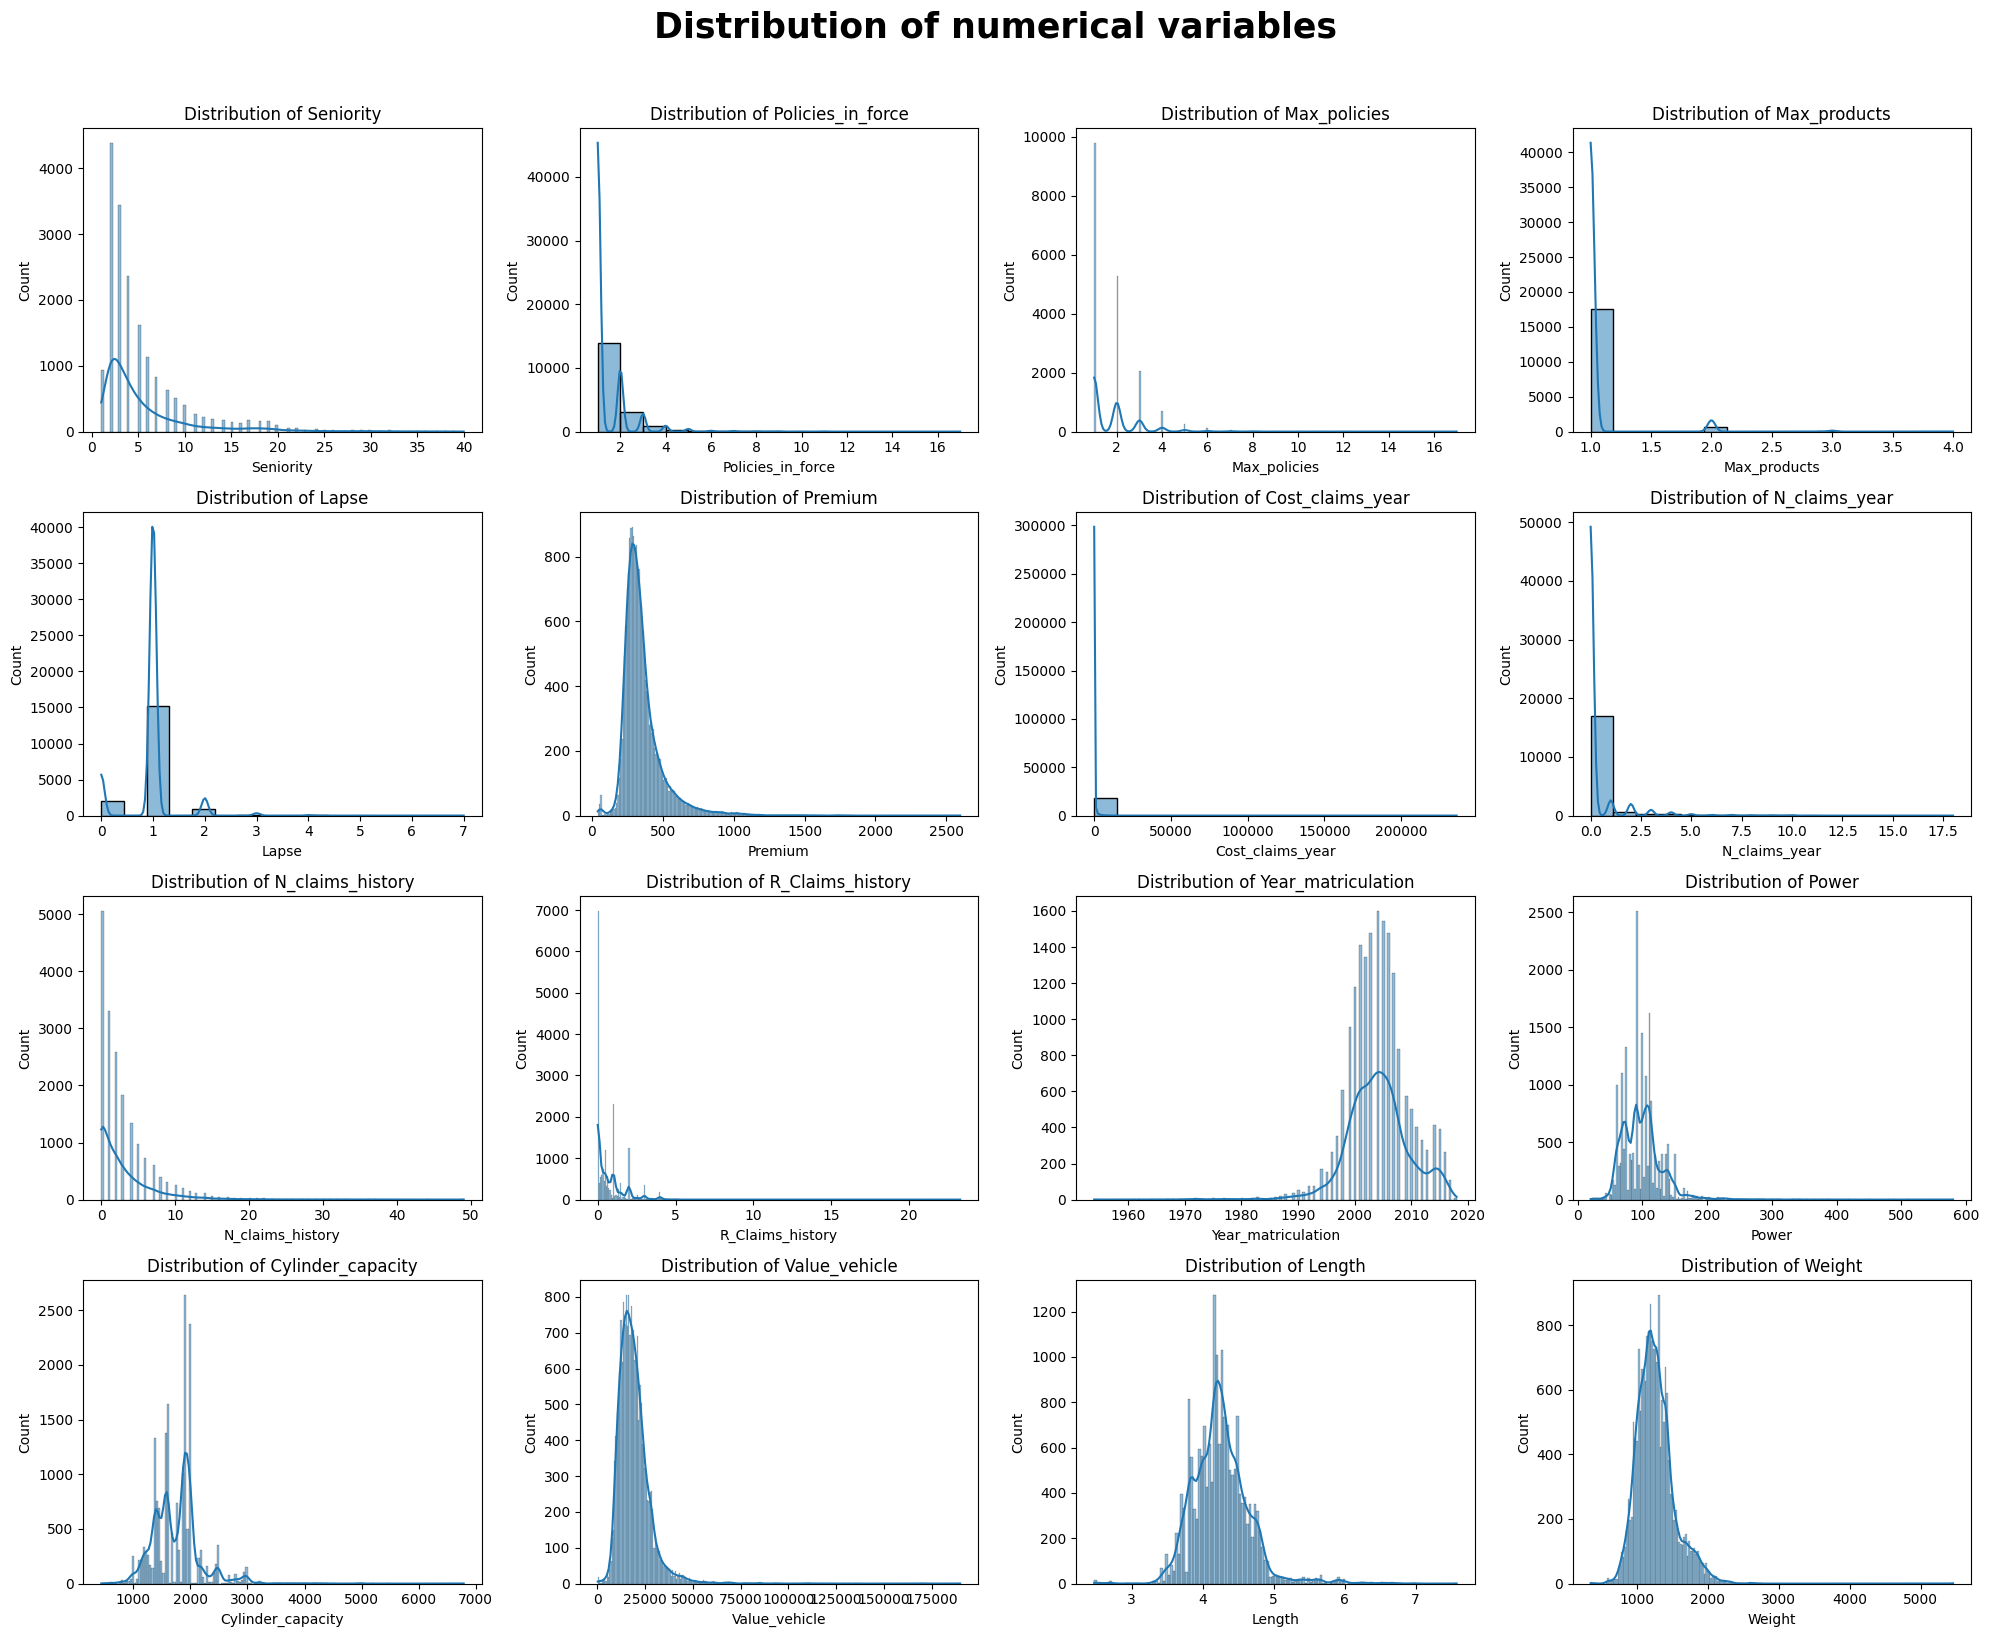

In [219]:
n_cols = 4
n_vars = len(numeric_cols)
n_rows = (n_vars + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df.dropna(), x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of numerical variables", size=25,fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### Distribution of categorical values

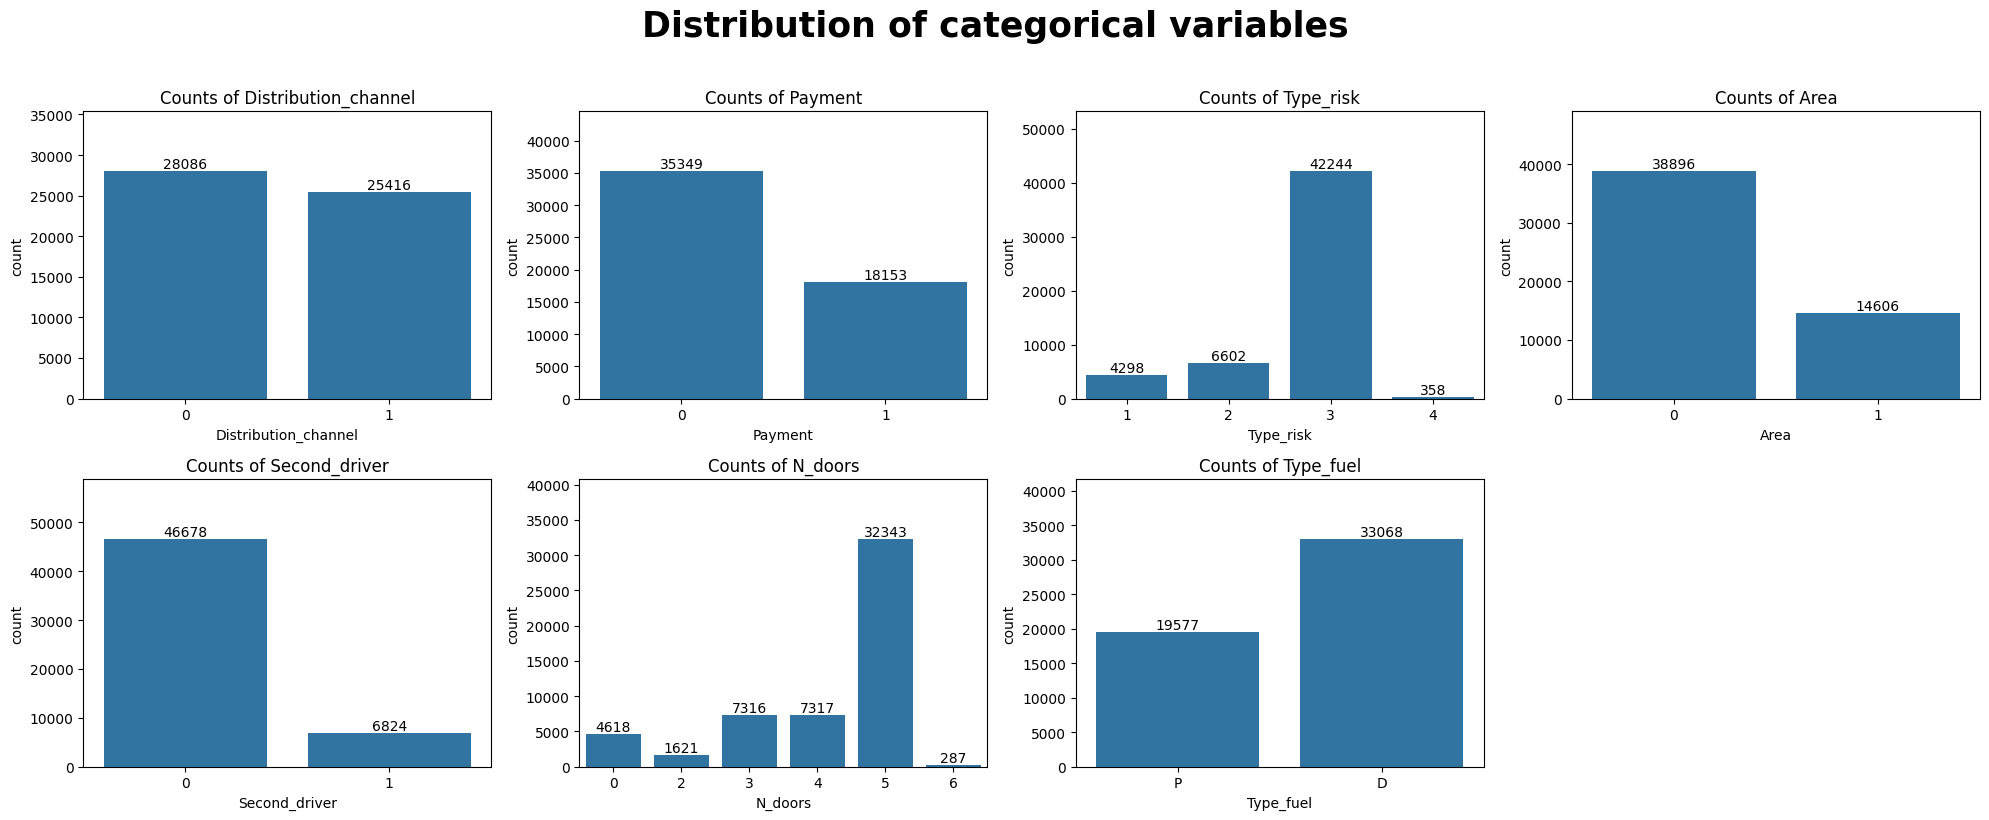

In [220]:
n_cols = 4 
n_rows = (len(cat_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Counts of {col}')
    
    # Add count labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(container)
    
    # Increase y-limit by 20%
    current_ylim = axes[i].get_ylim()
    axes[i].set_ylim([0, current_ylim[1] * 1.2])

# Hide unused subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of categorical variables", size=25,fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

### Multivariate Analysis

#### Correlation Matrix

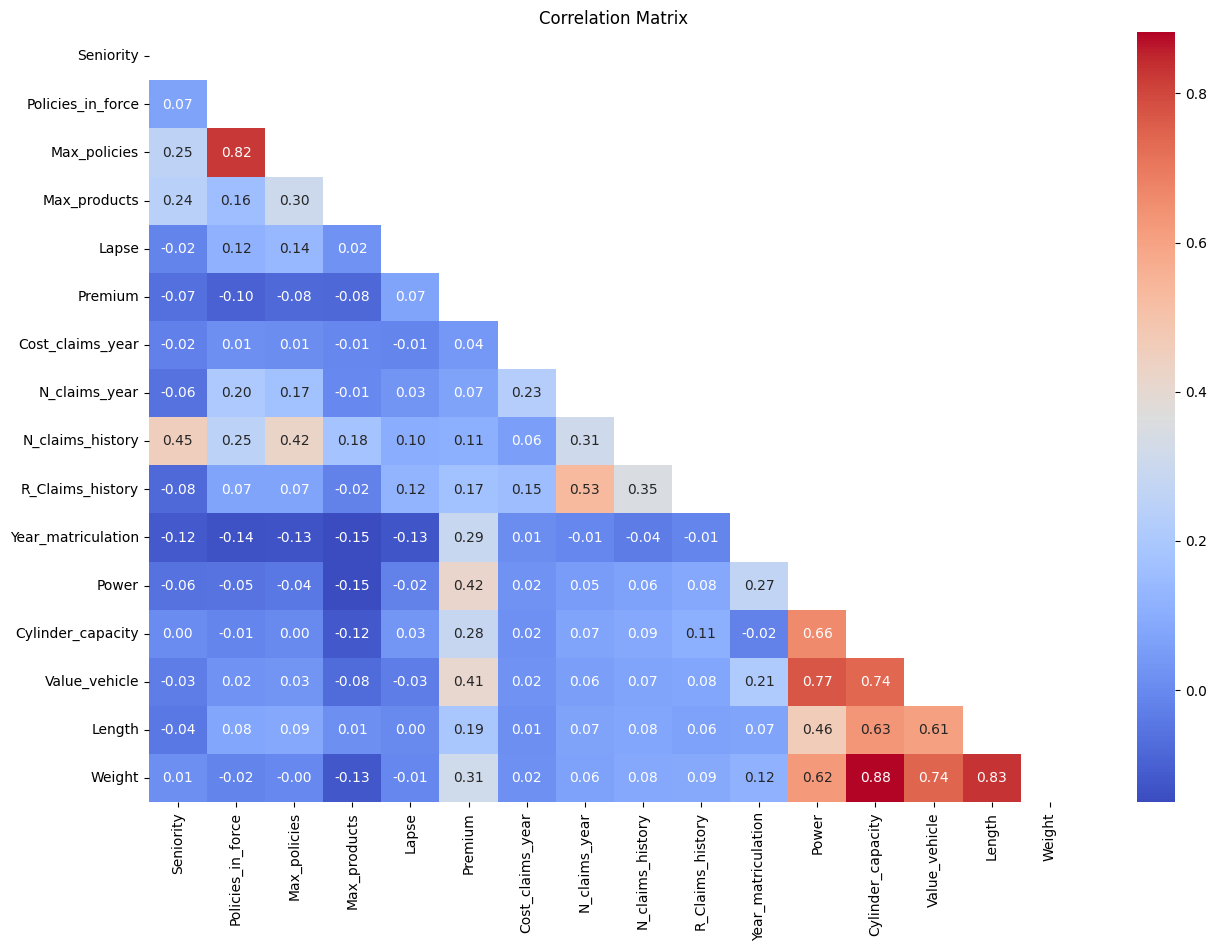

In [221]:
# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with upper triangle only
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## **Part 3: Build predictive models**

---

### **First Stage**


> - 1. Missing Data Imputation 
> - 2. Encoding Categorical Columns 
> - 3. Models Preliminary Selection

#### **Missing Data Imputation**

In part 1, we acknowledged that `Type_fuel, Length and Date_lapse` have missing values. We will therefore begin by cleaning these values.

**Type_fuel**

 Vehicles with similar risk profiles and physical characteristics (door count) are likely to have similar engine/fuel type configurations. This approach preserves logical consistency while using the most frequent value from comparable vehicles.

In [222]:
df['Type_fuel'] = df.groupby(['Type_risk','N_doors'])['Type_fuel'].transform(lambda x: x.fillna(x.mode()[0]))

In [223]:
# Recheck
df['Type_fuel'].isna().sum()

0

**Length**

Vehicles from the same geographical area with the same door count tend to have similar size profiles. Using the median within these logical groupings provides a robust estimate that is less affected by outliers than the mean.

In [224]:
df['Length'] = df.groupby(['Area','N_doors'])['Length'].transform(lambda x: x.fillna(x.median()))

In [225]:
# Recheck
df['Length'].isna().sum()

0

**Date_lapse**

More than 60% data is missing. Imputation only products bias therefore we will completely remove it.

In [226]:
df = df.drop('Date_lapse',axis=1)

#### **Encoding Categorical Columns**

In [227]:
cat = sniff_modified(df)
cat[cat['data type'] == 'object']

,data type,percent missing,No. unique,unique values
Type_risk,object,0.0,4,"[1, 3, 2, 4]"
Area,object,0.0,2,"[0, 1]"
Second_driver,object,0.0,2,"[0, 1]"
N_doors,object,0.0,6,"[0, 5, 4, 3, 2, 6]"
Type_fuel,object,0.0,2,"[P, D]"
Payment,object,0.0,2,"[0, 1]"


In [228]:
binary_cols = ['Distribution_channel','Payment', 'Area', 'Second_driver','Type_fuel'] #BinaryEncoder
risk_cols = ['Type_risk'] # OneHot                                   
doors_cols  = ['N_doors'] # Ordinal Encoder

**Pipeline**

In [229]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer([
    # We remove handle_unknown='ignore' here because for binary columns, 
    ("binary", OneHotEncoder(drop='if_binary', sparse_output=False), binary_cols),
    
    # OneHot for multi-category columns
    ("risk", OneHotEncoder(handle_unknown='ignore', sparse_output=False), risk_cols),
    
    # Ordinal Encoder (Consider adding categories manually to ensure correct order)
    ("ord", OrdinalEncoder(), doors_cols)], remainder='passthrough').set_output(transform="pandas")

df_final = preprocessor.fit_transform(df)   

In [230]:
# Rename for readability
df_final.rename(columns=lambda c: c.replace('remainder__', ''), inplace=True)
df_final.head()

,binary__Distribution_channel_1,binary__Payment_1,binary__Area_1,binary__Second_driver_1,binary__Type_fuel_P,risk__Type_risk_1,risk__Type_risk_2,risk__Type_risk_3,risk__Type_risk_4,ord__N_doors,...,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,Length,Weight
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,2004,80,599,7068.00,5.100,190
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,2004,80,599,7068.00,5.100,190
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0,0,0.0,2013,85,1229,16030.00,3.999,1105
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,1986,6,74,1261.82,5.100,87
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,1986,6,244,3000.00,5.100,92


### Preliminary Selection

In [231]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

# Define SMAPE
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [232]:
X = df_final.drop(['Premium','ID',
                   # Remove Date columns since models cannot handle it, we will feature engineering it in the later stage
                   'Date_start_contract','Date_last_renewal','Date_next_renewal',
                   'Date_birth','Date_driving_licence'],axis=1)
y = df_final['Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Linear_Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Random_Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Define your scoring dictionary (as you had it)
scoring_metrics = {
    'R2': 'r2',
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error'
}

results = []

print("Running Preliminary Selection...")
for name, model in models.items():
    # Use cross_validate to handle the dictionary of metrics
    cv_results = cross_validate(model, X, y, cv=2, scoring=scoring_metrics)
    
    # Store the means of the results
    results.append({
        "Model": name,
        "R2": np.mean(cv_results['test_R2']),
        # We multiply by -1 because sklearn returns negative values for error metrics
        "MAE": -np.mean(cv_results['test_MAE']),
        "RMSE": -np.mean(cv_results['test_RMSE']),
        "R2_Std": np.std(cv_results['test_R2'])
    })

Running Preliminary Selection...


#### Evaluate the baseline model 

In [234]:
model_results = pd.DataFrame(results).sort_values(by="R2", ascending=False).reset_index()
model_results

,index,Model,R2,MAE,RMSE,R2_Std
0,2,XGBoost,0.384851,73.743045,112.900098,0.016958
1,1,Random_Forest,0.374085,75.181255,113.874044,0.020017
2,0,Linear_Regression,0.341353,77.603473,116.834198,0.014842


Scatterplot Actual vs Predicted for all models

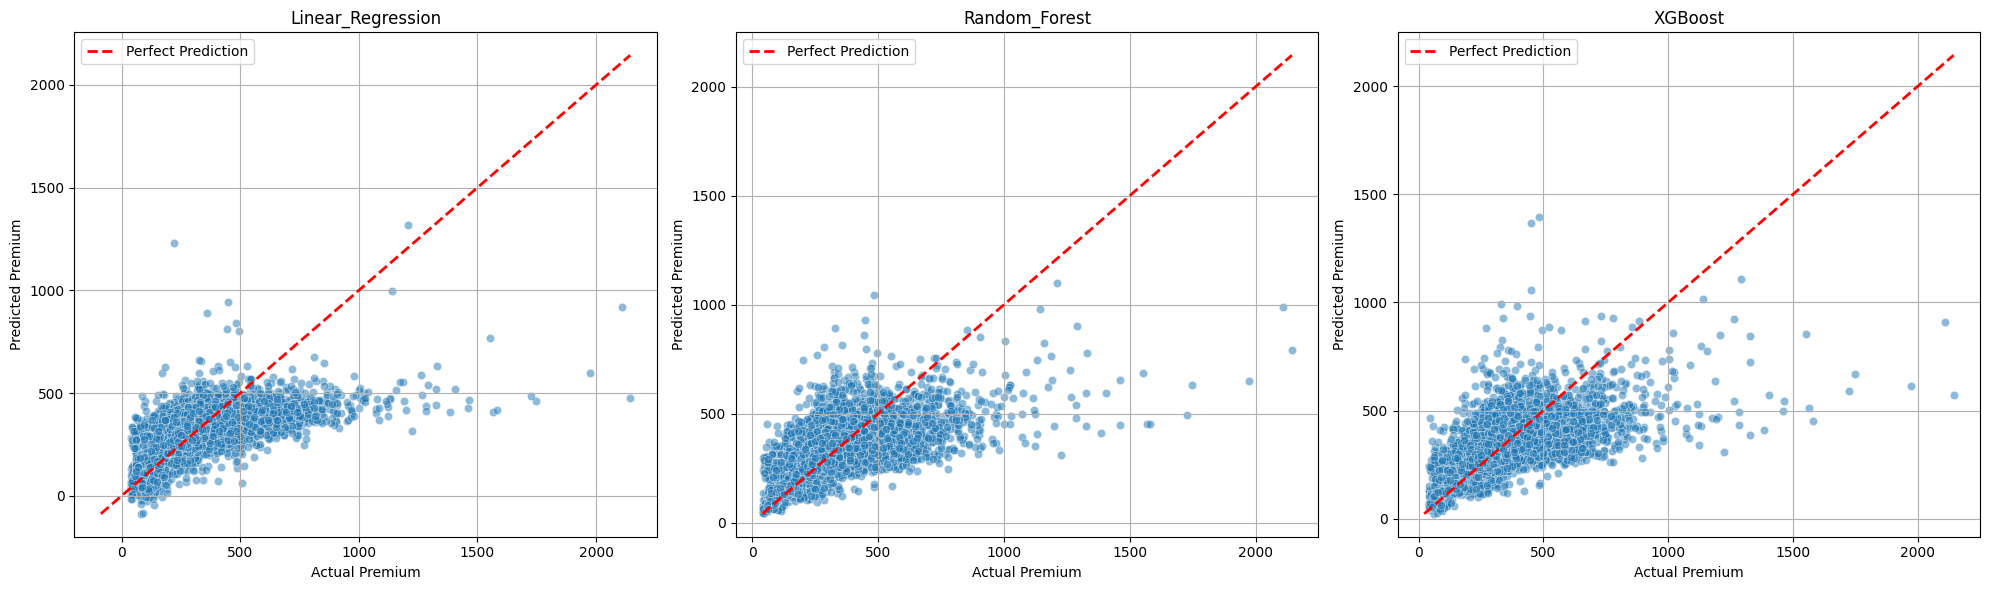

In [235]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (name, pipeline) in enumerate(models.items()):
    # The pipeline automatically scales X_train and fits the model
    pipeline.fit(X_train, y_train)
    
    # The pipeline automatically scales X_test before predicting
    y_pred = pipeline.predict(X_test)
    
    # Plotting on the specific subplot
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=axes[i])
    
    # Add diagonal "Perfect Prediction" line
    line_min = min(y_test.min(), y_pred.min())
    line_max = max(y_test.max(), y_pred.max())
    axes[i].plot([line_min, line_max], [line_min, line_max], 
                 color='red', linestyle='--', lw=2, label='Perfect Prediction')
    
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Actual Premium')
    axes[i].set_ylabel('Predicted Premium')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

> XGBoost is the superior choice because it captures 4% more predictive signal ($R^2$ 0.38 vs 0.34) while maintaining nearly the same level of stability as the Linear model. With a lower MAE of 73.74, it provides more accurate pricing by identifying complex, non-linear patterns that a simple straight line misses

#### Variable Importances

Getting feature importances from the winner 

In [236]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': xgb.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

print("Feature Importances:")
display(feature_importances.head(10))

Feature Importances:


,feature,importance
0,ord__N_doors,0.304739
1,risk__Type_risk_4,0.129226
2,binary__Payment_1,0.089597
3,Value_vehicle,0.051519
4,Year_matriculation,0.048167
5,Lapse,0.043466
6,binary__Second_driver_1,0.040451
7,Policies_in_force,0.032199
8,R_Claims_history,0.030222
9,Power,0.022566


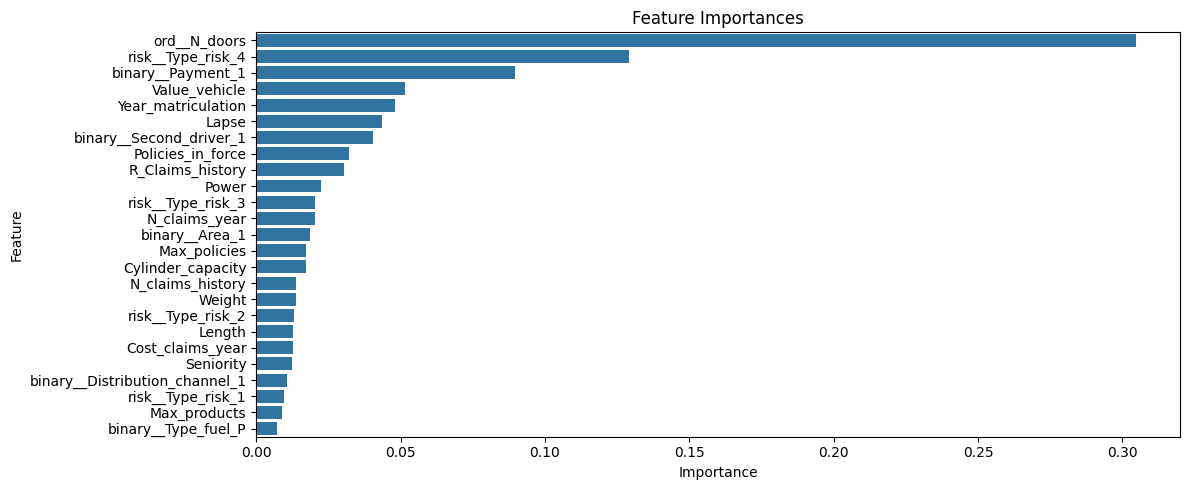

In [237]:
# Display
plt.figure(figsize=(12, 5))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **Middle Stage**

> - 1. Denoising
> - 2. Feature Engineering

### Denoising outliers


In [238]:
# Get noised columns
noised_cols = ['Premium']

# Remove outliers for each column (keep values between 1th and 99th percentile)
for col in noised_cols:
    lower = df_final[col].quantile(0.00)
    upper = df_final[col].quantile(0.99)
    df_final = df_final[(df_final[col] >= lower) & (df_final[col] <= upper)]

print(f"Original shape: {df_final.shape}")
print(f"Clean shape: {df_final.shape}")

Original shape: (52966, 32)
Clean shape: (52966, 32)


### Feature Engineering

Driver Features

In [239]:
# Create Driver_Age 
df_final['Driver_Age'] = (df_final['Date_last_renewal'] - df_final['Date_birth']).dt.days // 365

# Driving Experience (Years since getting license)
df_final['Driving_Experience'] = df_final['Date_last_renewal'].dt.year - df_final['Date_driving_licence'].dt.year

Vehicle Features

In [240]:
#Vehicle age (Current year - Registration year)
df_final['Vehicle_Age'] = df_final['Date_last_renewal'].dt.year - df_final['Year_matriculation']

# Power-to-Weight Ratio (High ratio = High Risk/Performance)
df_final['Power_Weight_Ratio'] = df_final['Power'] / df_final['Weight']

# Value per Age (Risk factor for younger drivers in expensive cars)
df_final['Value_per_Age'] = df_final['Value_vehicle'] / (df_final['Driver_Age'] + 1)

DateTime Features

In [241]:
# Already remove in dataset, just need to remove from date_columns 
date_columns.remove('Date_lapse')

def add_date_features(df, date_column):
    """Add datetime features for a specific column"""
    df[f'{date_column}_year'] = df[date_column].dt.year
    df[f'{date_column}_month'] = df[date_column].dt.month
    df[f'{date_column}_day'] = df[date_column].dt.day

    # Remove original date column
    df = df.drop(date_column, axis=1)
    return df

# Apply to df
for date_column in date_columns:
    df_final = add_date_features(df_final, date_column)

#Recheck
df_final.iloc[:,30:].head()

,Power_Weight_Ratio,Value_per_Age,Date_start_contract_year,Date_start_contract_month,Date_start_contract_day,Date_last_renewal_year,Date_last_renewal_month,Date_last_renewal_day,Date_next_renewal_year,Date_next_renewal_month,Date_next_renewal_day,Date_birth_year,Date_birth_month,Date_birth_day,Date_driving_licence_year,Date_driving_licence_month,Date_driving_licence_day
0,0.421053,112.190476,2015,11,5,2018,11,5,2019,11,5,1956,4,15,1976,3,20
1,0.421053,112.190476,2017,9,26,2018,9,26,2019,9,26,1956,4,15,1976,3,20
2,0.076923,364.318182,2013,11,29,2018,11,29,2019,11,29,1975,3,18,1995,7,10
3,0.068966,27.430870,2016,10,21,2018,10,21,2019,10,21,1973,7,10,1993,7,5
4,0.065217,66.666667,2017,5,12,2018,5,12,2019,5,12,1973,7,10,1993,7,5


Extract data from removed rows

In [242]:
orgi = pd.read_csv('Motor vehicle insurance data.csv',delimiter=';')

def hist_claim_mean(x):
    if len(x) <= 1:
        return np.nan           # NaN is more honest
    return x.iloc[:-1].mean()   # exclude last (current) value

agg_features = orgi.groupby('ID').agg(    
    n_renewals           = ('ID', 'count'),
    hist_claim_mean    = ('Premium', hist_premium_mean),
    ever_claimed         = ('N_claims_year', lambda x: int((x > 0).any())),
    total_claims_amount  = ('Cost_claims_year', 'sum'),
).reset_index()

# merge adds the new columns based on matching IDs
df_final = pd.merge(df_final, agg_features, on='ID', how='left')

Test the model again with new features + denoised

In [243]:
X = df_final.drop(['Premium','ID'],axis=1)
y = df_final['Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
# Initialize the model 
xgb_model = XGBRegressor(random_state=42)

# Fit and predict 
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Check  score
print(f"XGBoost R^2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"SMAPE: {smape(y_test, y_pred)}")

XGBoost R^2 Score: 0.6952260035300051
MAE: 40.85313639509559
RMSE: 68.4547173974244
SMAPE: 13.182738434233963


> By refining the data through denoising and feature engineering, the model's performance improved significantly, increasing the $R^2$ score from 0.38 to 0.45. This progression demonstrates that the mid-stage enhancements successfully captured more complex patterns and reduced noise compared to the baseline model.

In [245]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

print("Feature Importances:")
display(feature_importances.head())

Feature Importances:


,feature,importance
0,ord__N_doors,0.309841
1,hist_claim_mean,0.197079
2,risk__Type_risk_4,0.065395
3,binary__Payment_1,0.034917
4,Value_per_Age,0.030246


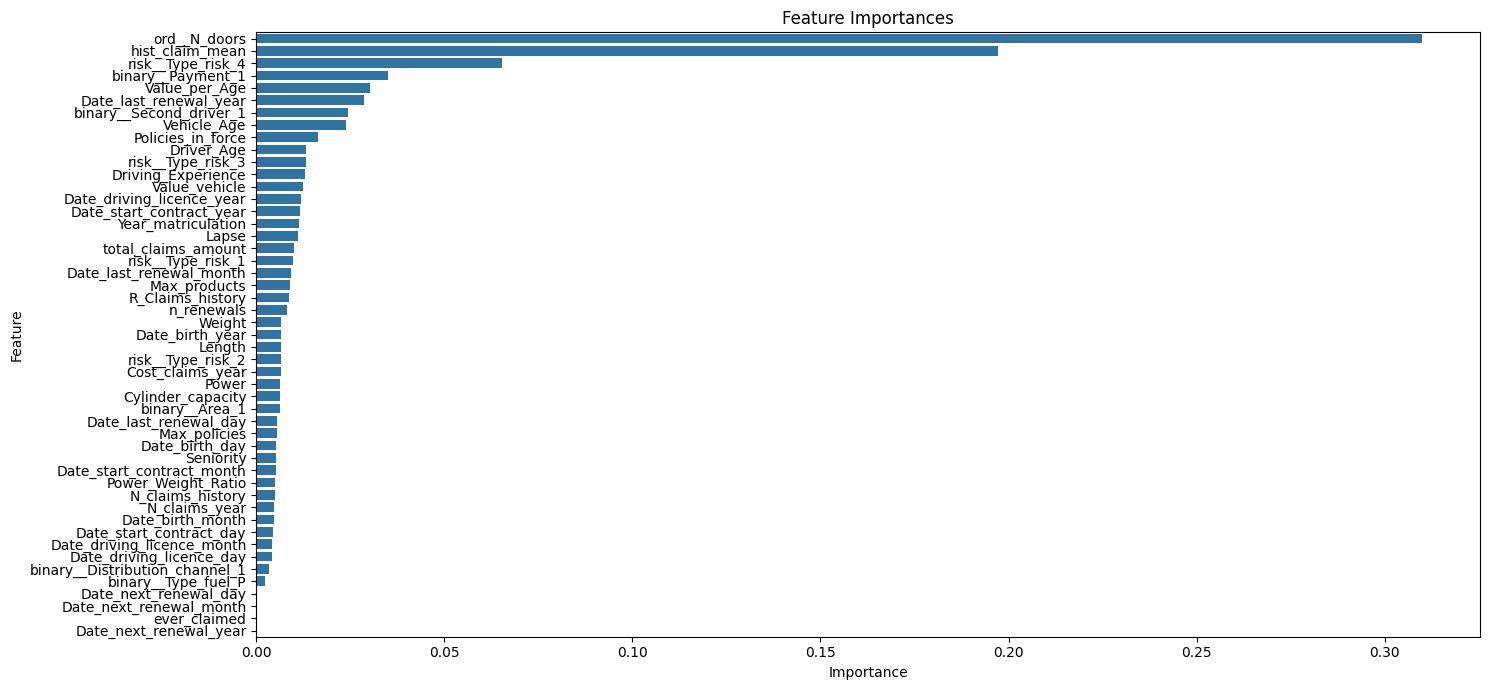

In [246]:
# Display
plt.figure(figsize=(15, 7))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Final Stage

> - Removing some redundant features and low-signal noise to simply the model
> - Hyperparameter tuning


### Removing Noise

**Date Next Renewal**

In [247]:
df_final = df_final.drop(['Date_next_renewal_year','Date_next_renewal_month','Date_next_renewal_day'],axis=1)

**Driver Age vs Date_birth columns**

all features engineered from date_birth gave very low scores => remove

In [248]:
df_final = df_final.drop(['Date_birth_year','Date_birth_month','Date_birth_day'],axis=1)

**Year matriculation vs Vehicle Age columns**

This might cause Multicollinearity

In [249]:
df_final = df_final.drop(['Year_matriculation'],axis=1)

In [250]:
X = df_final.drop(['Premium','ID'],axis=1)
y = df_final['Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model 
xgb_model = XGBRegressor(random_state=42)

# Fit and predict 
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Check  score
print(f"XGBoost R^2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"SMAPE: {smape(y_test, y_pred)}")

XGBoost R^2 Score: 0.693270635877741
MAE: 40.91154768029361
RMSE: 68.67396203831136
SMAPE: 13.20150980838326


In [251]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

print("Feature Importances:")
display(feature_importances.head())

Feature Importances:


,feature,importance
0,ord__N_doors,0.277915
1,hist_claim_mean,0.221562
2,risk__Type_risk_4,0.067567
3,binary__Payment_1,0.043842
4,Value_per_Age,0.035716


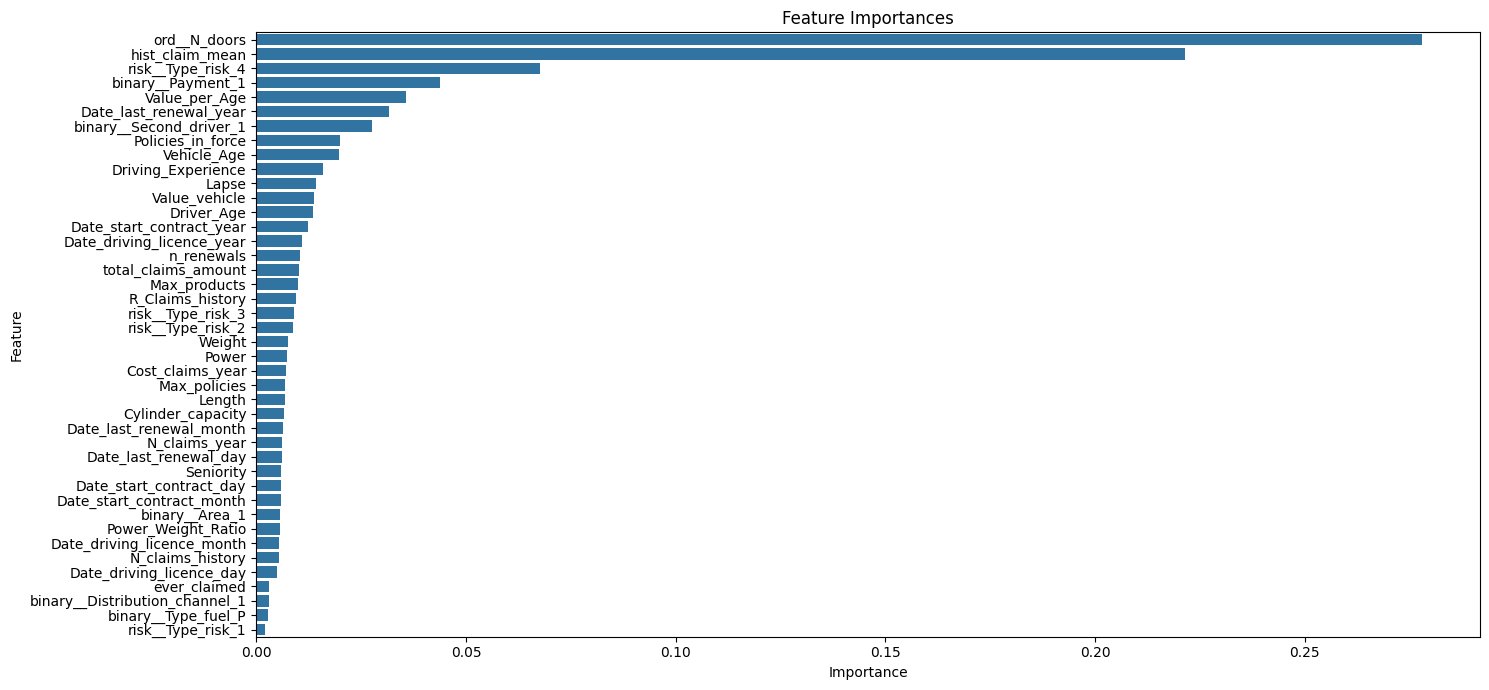

In [252]:
# Display
plt.figure(figsize=(15, 7))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Hyperparameter tuning**

In [253]:
# from sklearn.model_selection import RandomizedSearchCV

# # 1. Define the aggressive search space
# param_grid = {
#     'n_estimators': [500, 1000, 2000],          # High number of trees (use early stopping)
#     'max_depth': [3, 5, 7, 9, 12],              # Allow for deep trees to catch complex risk factors
#     'learning_rate': [0.01, 0.03, 0.05, 0.1,0.25],   # Smaller steps for higher precision
#     'subsample': [0.6, 0.7, 0.8, 0.9],          # Prevent overfitting by using 60-90% of data per tree
#     'colsample_bytree': [0.5, 0.7, 0.8, 0.9],   # Feature sampling (prevents one feature from dominating)
#     'gamma': [0, 0.1, 0.2, 0.5, 1, 5],          # Minimum loss reduction to split (Regularization)
#     'min_child_weight': [1, 3, 5, 10],          # Stop trees if they get too specific to 1-2 people
#     'reg_alpha': [0, 0.01, 0.1, 1],             # L1 regularization
#     'reg_lambda': [1, 2, 5, 10]                 # L2 regularization
# }

# # 2. Initialize the model
# xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# # 3. Setup the search (n_iter=50 is aggressive but efficient)
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=50, 
#     scoring='neg_mean_absolute_error', # Optimize to lower your $61 error directly
#     cv=5, 
#     verbose=2, 
#     random_state=42,
#     n_jobs=-1
# )

# # 4. Fit the search
# random_search.fit(X_train, y_train)

# # 5. Get the best model
# best_xgb = random_search.best_estimator_

After running best parameters are:

best_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 9,
    'gamma': 5,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 2,
    'random_state': 42,
    'n_jobs': -1
}

In [254]:
X = df_final.drop(['Premium','ID'],axis=1)

y = df_final['Premium']

# Train: 70%, Rest: 30%
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)

# Split Rest into Val (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

print(f"70/15/15 Split:")
print(f"Train: {len(X_train)} samples")
print(f"Val: {len(X_val)} samples") 
print(f"Test: {len(X_test)} samples")

70/15/15 Split:
Train: 37076 samples
Val: 7945 samples
Test: 7945 samples


In [255]:
# Best tune
best_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 9,
    'gamma': 5,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 2,
    'random_state': 42,
    'n_jobs': -1
}

# Initialize the model 
xgb_model = XGBRegressor(**best_params)

# Fit and predict 
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Check  score
print(f"XGBoost R^2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"SMAPE: {smape(y_test, y_pred)}")

XGBoost R^2 Score: 0.7003484878492907
MAE: 39.85451910102705
RMSE: 68.57142291179967
SMAPE: 12.570439536570593


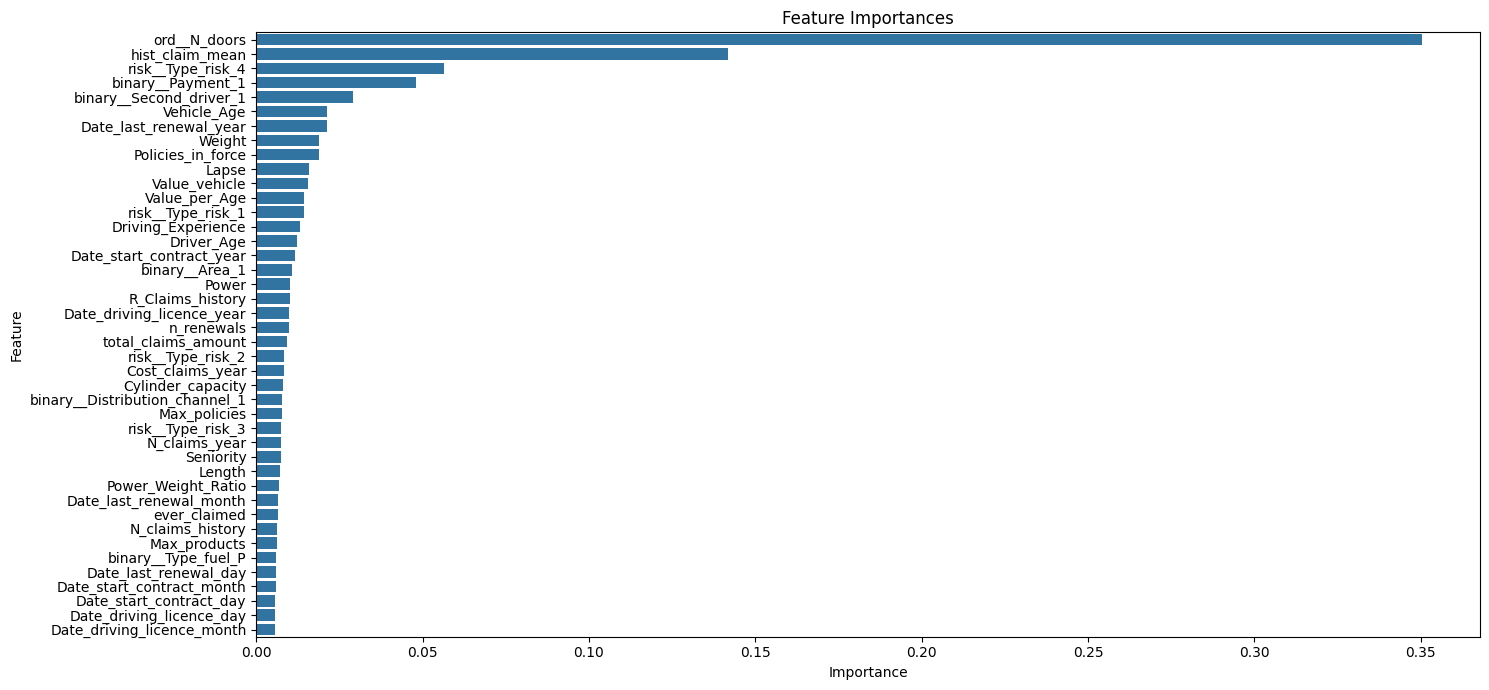

In [256]:
# FI
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

# Display
plt.figure(figsize=(15, 7))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

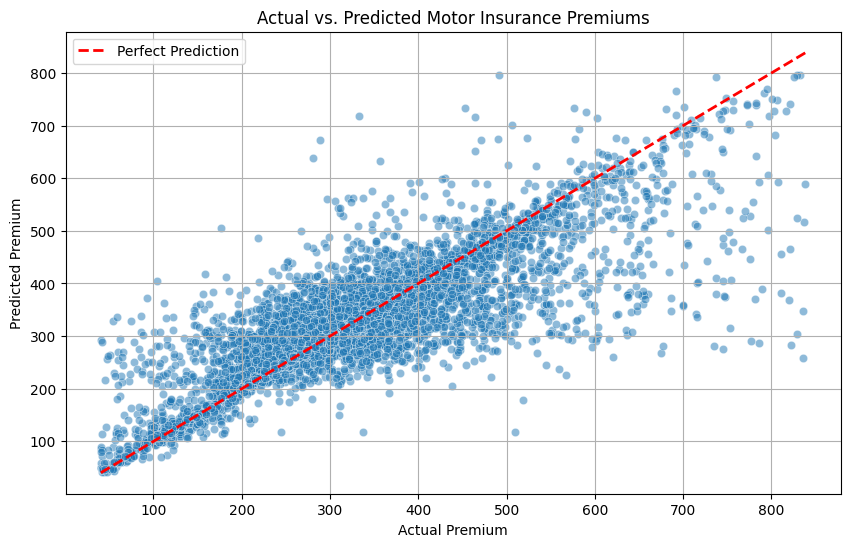

In [257]:
# Assuming y_test contains actual values and y_pred contains model predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Add a diagonal line to represent perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Motor Insurance Premiums')
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.legend()
plt.grid(True)
plt.show()

In [258]:
xgb_model = XGBRegressor(**best_params)

# Fit and predict 
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)

# Check  score
print(f"XGBoost R^2 Score: {r2_score(y_val, y_pred)}")
print(f"MAE: {mean_absolute_error(y_val, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_val, y_pred)}")
print(f"SMAPE: {smape(y_val, y_pred)}")

XGBoost R^2 Score: 0.7133622989711546
MAE: 38.35015119445301
RMSE: 65.19234940149563
SMAPE: 12.265318116831095


## Verdict

- R² Score - 0.71: Model has learned about around 71% of the "rules" that determine a car's premium.

- MAE - 38.23: On average, model is off by $38 europe per prediction (plus minus).

- sMAPE - 12.22%: Model's accuracy is roughly 88% (100% minus 12.22% error).

>"Overall, the model explained nearly 70% of the variance. However, it lacks the features necessary to accurately predict premiums in the $600–$800 range, as shown in the scatterplot above."

### Making extra check for 1.time customers

In [259]:
# Filter the final dataframe for IDs in id_solo
id_solo_data = df_final[df_final['ID'].isin(agg_features[agg_features['hist_claim_mean'].isna()]['ID'])]

# Prepare features (same as during training)
X_id_solo = id_solo_data.drop(['Premium', 'ID'], axis=1)

# Make predictions
id_solo_predictions = xgb_model.predict(X_id_solo)

# Create a dataframe with IDs, actual premiums, and their predictions
id_solo_results = pd.DataFrame({
    'ID': id_solo_data['ID'],
    'Actual_Premium': id_solo_data['Premium'].values,
    'Predicted_Premium': id_solo_predictions
})

# Calculate error metrics
id_solo_results['Prediction_Error'] = id_solo_results['Predicted_Premium'] - id_solo_results['Actual_Premium']
id_solo_results['Absolute_Error'] = np.abs(id_solo_results['Prediction_Error'])

# Calculate percentage error
id_solo_results['Percentage_Error'] = (id_solo_results['Prediction_Error'] / id_solo_results['Actual_Premium']) * 100
id_solo_results['Absolute_Percentage_Error'] = np.abs(id_solo_results['Percentage_Error'])

# Display the results
print("Predictions for single-renewal IDs:")
id_solo_results.head()  


Predictions for single-renewal IDs:


,ID,Actual_Premium,Predicted_Premium,Prediction_Error,Absolute_Error,Percentage_Error,Absolute_Percentage_Error
6,7,340.43,355.267639,14.837639,14.837639,4.358499,4.358499
18,19,265.69,267.054565,1.364565,1.364565,0.513593,0.513593
23,24,328.02,333.756622,5.736622,5.736622,1.748864,1.748864
24,25,229.88,322.317291,92.437291,92.437291,40.211106,40.211106
26,27,283.09,329.205078,46.115078,46.115078,16.289900,16.289900


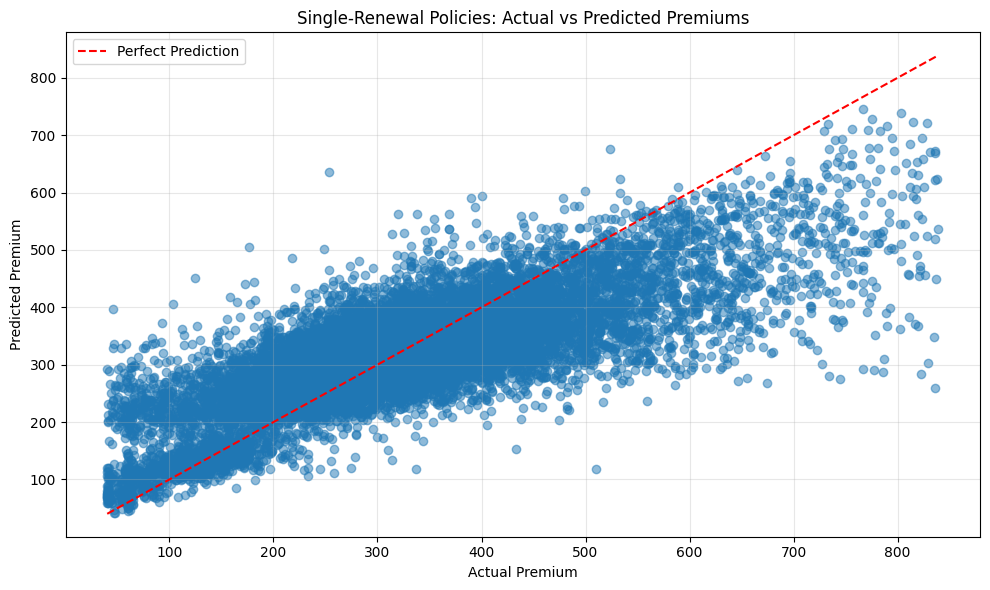

In [ ]:
# Create a simple scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(id_solo_results['Actual_Premium'], id_solo_results['Predicted_Premium'], alpha=0.5)

# Add the perfect prediction line (y=x line)
min_val = min(id_solo_results['Actual_Premium'].min(), id_solo_results['Predicted_Premium'].min())
max_val = max(id_solo_results['Actual_Premium'].max(), id_solo_results['Predicted_Premium'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Single-Renewal Policies: Actual vs Predicted Premiums')

plt.grid(True, alpha=0.3)

plt.legend()
# Show
plt.tight_layout()
plt.show()

In [261]:
r2_single = r2_score(id_solo_results['Actual_Premium'], id_solo_results['Predicted_Premium'])
print(f"Single-Renewal: {r2_single:.4f}")

Single-Renewal: 0.6244
